<a href="https://colab.research.google.com/github/garfield-gray/Soft-Computing/blob/main/MNSV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import time

In [2]:
ObjF_S1 = lambda x: np.power(x[:,0]+5,2) + np.power(x[:,1]+5,2) -10*np.cos(2*np.pi*x[:,0]) -10*np.cos(2*np.pi*x[:,1]) + 20

In [40]:
# MNSV_S1_1.m

import numpy as np
import matplotlib.pyplot as plt


t1 = time.time()
# Define MNSV Parameters
N = 2                     # Number of variables
NS = 10                    # Number of samples
MAXIT = 40                # Maximum Number of iterations
OBJ_F = ObjF_S1           # Name of objective function
R = np.array([[-10, 10], [-10, 10]])  # Bounds on decision variables
Best = []
xb = []

# Initialization
NP = NS * (NS + 3) // 2
# R1 = np.tile(R[0, :], (NP, 1))
# R2 = np.tile(R[1, :], (NP, 1))
x = np.random.uniform(R[0, 0], R[0, 1], (NP, 2))
f = ObjF_S1(x)                   #evaluation
for it in range(MAXIT):
  ind = np.argsort(f)
  x = x[ind[:NS]]                                         # choosing the best points
  a = np.power(0.3, (it/MAXIT))
  z = a*np.cov(x.T)
  for i in range(NS):
    x = np.append(x, np.random.multivariate_normal(x[i], z, (NS-i)), axis=0)  # appending new points
  x = np.minimum(np.maximum(x, R[:,0]), R[:,1])     # making sure we're in right bounderies
  f = ObjF_S1(x)                     #evaluation
  xb.append(x[np.argmin(f)])  #save the best
  Best.append(np.min(f))
  #plot
t2 = time.time()
print(t2-t1)

0.07967615127563477


In [44]:
xb

[array([-6.98654862, -6.92403587]),
 array([-4.03766808, -4.02487934]),
 array([-4.03766808, -4.02487934]),
 array([-4.03766808, -4.02487934]),
 array([-5.92291306, -5.02626343]),
 array([-4.9761517 , -4.03211099]),
 array([-4.9761517 , -4.03211099]),
 array([-4.9761517 , -4.03211099]),
 array([-5.98650457, -5.01231879]),
 array([-5.98650457, -5.01231879]),
 array([-5.98650457, -5.01231879]),
 array([-5.98650457, -5.01231879]),
 array([-5.98650457, -5.01231879]),
 array([-4.94002598, -5.02223732]),
 array([-4.94002598, -5.02223732]),
 array([-4.94002598, -5.02223732]),
 array([-4.94002598, -5.02223732]),
 array([-4.94002598, -5.02223732]),
 array([-4.94002598, -5.02223732]),
 array([-4.94002598, -5.02223732]),
 array([-4.97530992, -4.9989426 ]),
 array([-4.97530992, -4.9989426 ]),
 array([-4.99163232, -5.01626935]),
 array([-4.99940663, -4.99833027]),
 array([-4.99944657, -4.9992763 ]),
 array([-4.9999561 , -4.99911032]),
 array([-4.9998736 , -4.99985232]),
 array([-4.99996051, -4.9999

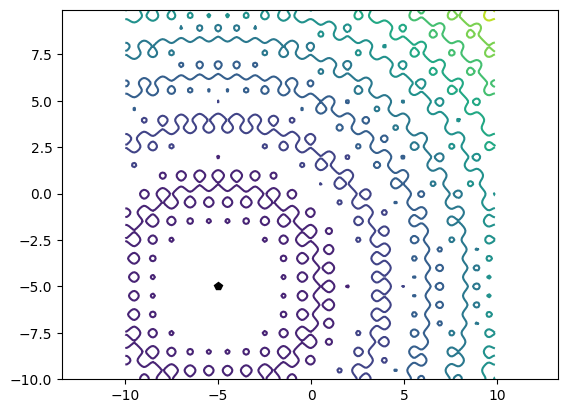

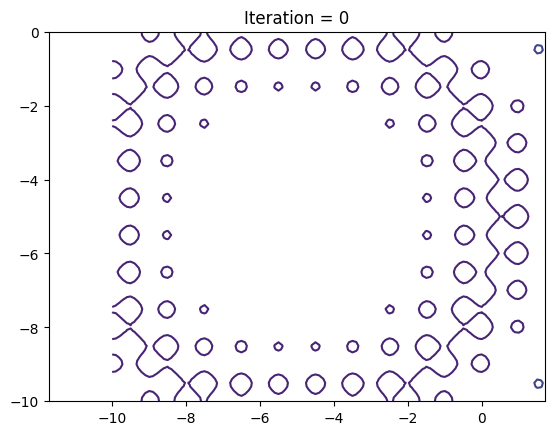

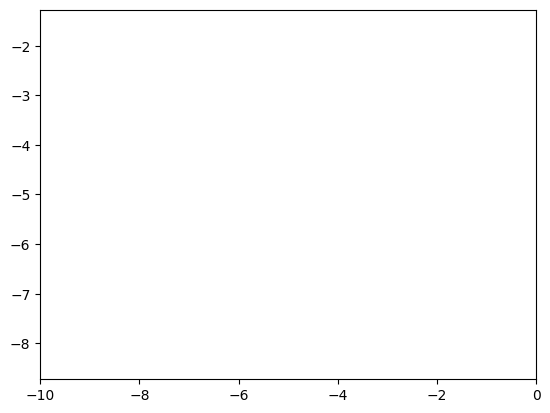

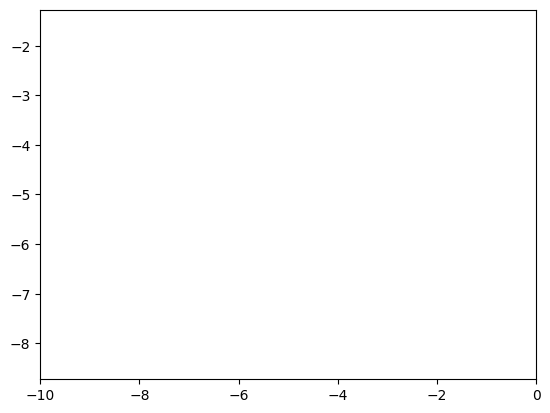

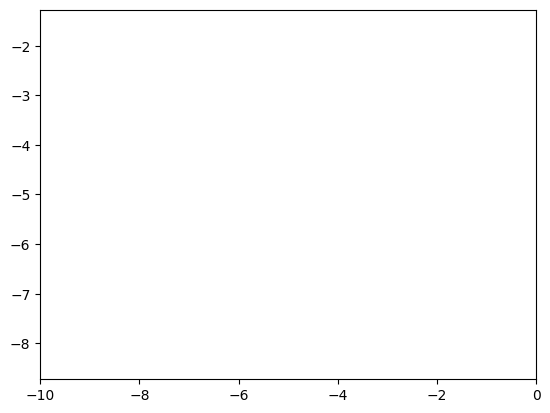

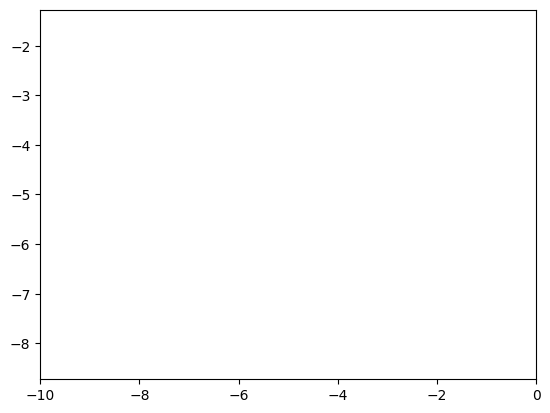

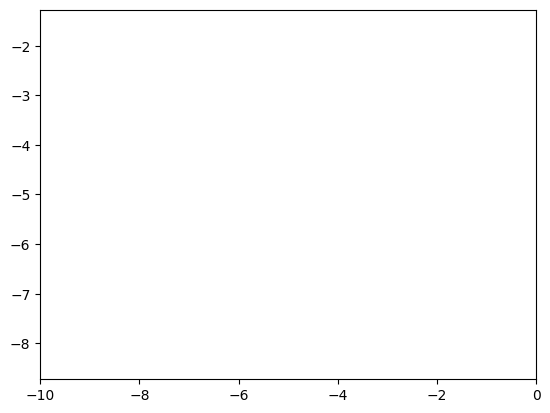

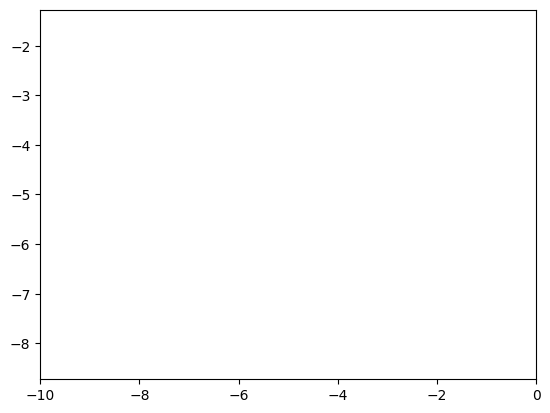

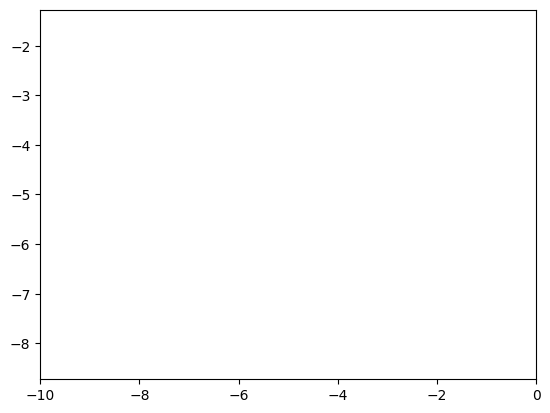

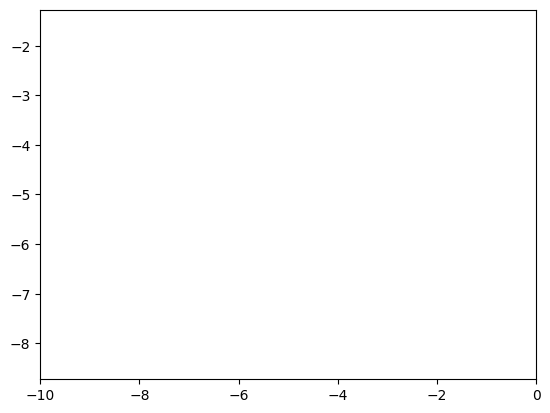

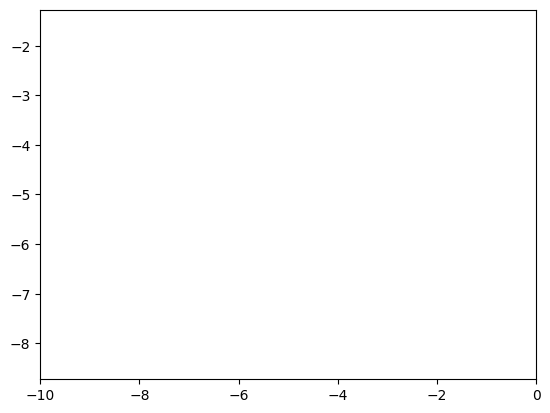

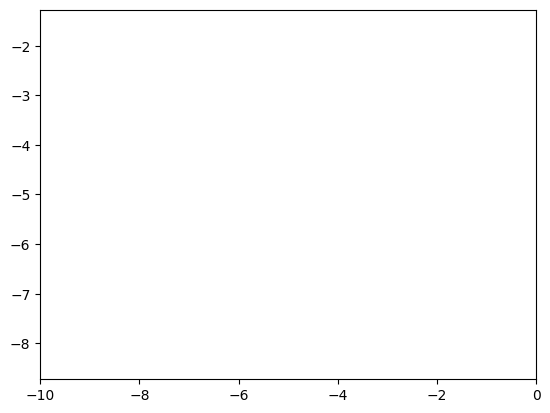

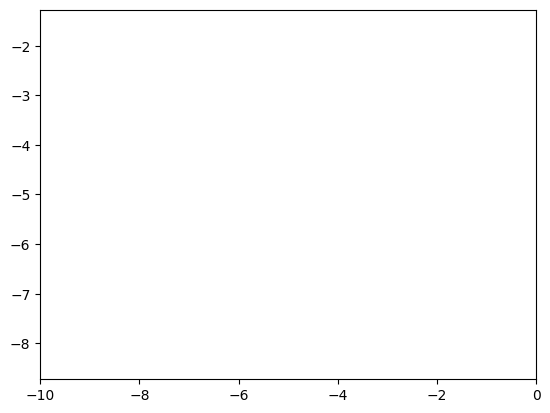

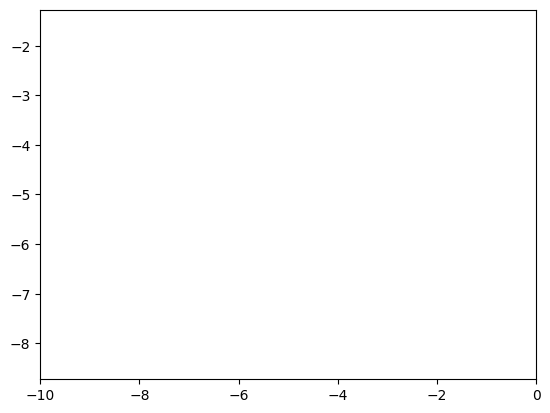

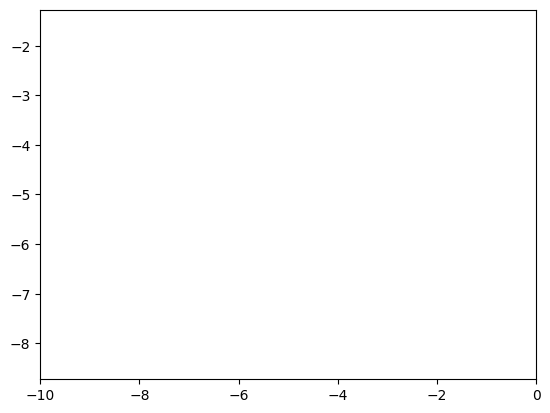

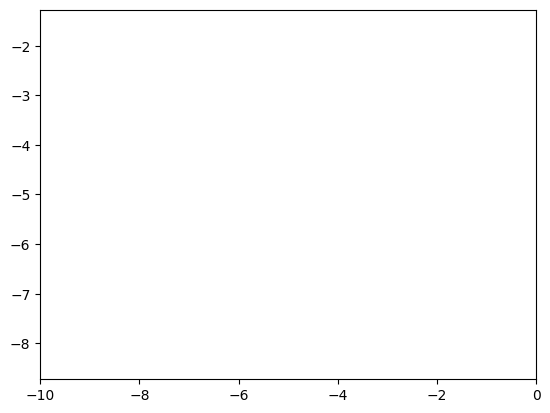

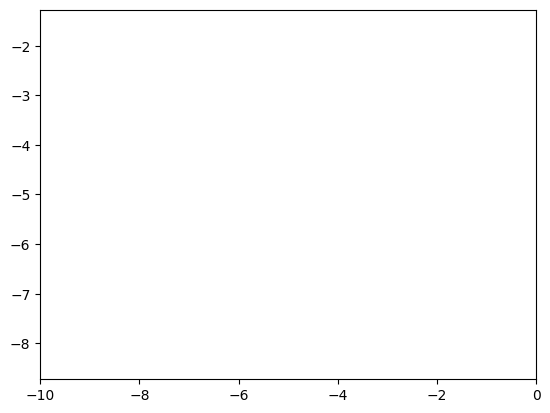

ValueError: operands could not be broadcast together with shapes (150,2) (135,2) (135,2) 

In [ ]:
# MNSV_S1_2.m


import numpy as np
import matplotlib.pyplot as plt

# Define the objective function ObjF_S1
def ObjF_S1(C):
    return np.sum((C + 5)**2 - 10 * np.cos(2 * np.pi * C)) + 20

# Define MNSV Parameters
N = 2                     # Number of variables
NS = 15                   # Number of samples
MAXIT = 30                # Maximum Number of iterations
OBJ_F = 'ObjF_S1'         # Name of objective function
R = np.array([[-10, 10], [-10, 10]])  # Bounds on decision variables

# Contour plot setup
xx = np.arange(-10, 10, 0.1)
yy = np.arange(-10, 10, 0.1)
P, Q = np.meshgrid(xx, yy)
F = (P + 5)**2 - 10 * np.cos(2 * np.pi * P) + (Q + 5)**2 - 10 * np.cos(2 * np.pi * Q) + 20

# Plot initial contour and point
plt.contour(xx, yy, F, 10)
plt.plot(-5, -5, 'kp')
plt.axis('equal')
plt.show()
plt.pause(0.5)

# Initialization
NP = int(NS * (NS + 3) / 2)
R1 = np.tile(R[0, :], (NP, 1))
R2 = np.tile(R[1, :], (NP, 1))
x = np.random.uniform(R1, R2)
f = np.apply_along_axis(ObjF_S1, 1, x)

# Main loop
Best = np.zeros(MAXIT)
for it in range(MAXIT):
    indices = np.argsort(f)
    x = x[indices[:NS], :]

    # Plot current iteration
    plt.clf()
    plt.contour(xx, yy, F, 10)
    plt.title('Iteration = ' + str(it))
    plt.plot(x[:, 0], x[:, 1], 'r*')
    plt.axis('equal')
    plt.axis([-10, 0, -10, 0])
    plt.show()
    plt.pause(0.5)

    a = (0.3) ** (it / MAXIT)
    z = a * np.var(x, axis=0)

    # Plot ellipses
    t = np.arange(0, 2 * np.pi, 0.01)
    for i in range(NS):
        x1 = x[i, 0] + np.sqrt(z[0]) * np.cos(t)
        y1 = x[i, 1] + np.sqrt(z[1]) * np.sin(t)
        plt.plot(x1, y1)
        plt.axis('equal')
        plt.axis([-10, 0, -10, 0])
        plt.pause(0.1)

    # Generate new samples
    for i in range(NS):
        x = np.vstack([x, np.random.multivariate_normal(x[i, :], np.diag(z), NS + 1 - i)])

    x = np.clip(x, R1, R2)
    f = np.apply_along_axis(ObjF_S1, 1, x)

    fb, j = np.min(f), np.argmin(f)
    xb = x[j, :]
    Best[it] = fb

    print("Iteration:", it + 1)
    print("xmin:", xb)
    print("fmin:", fb)
    print("----")

xmin, fmin = xb, fb
print('Final xmin:', xmin)
print('Final fmin:', fmin)
